<a href="https://colab.research.google.com/github/Enzo1193/S-S/blob/main/14_11_2024_se%C3%B1ales_y_sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$x(t) = 200\cos(100 t)- 50 \sin(200t +5)$

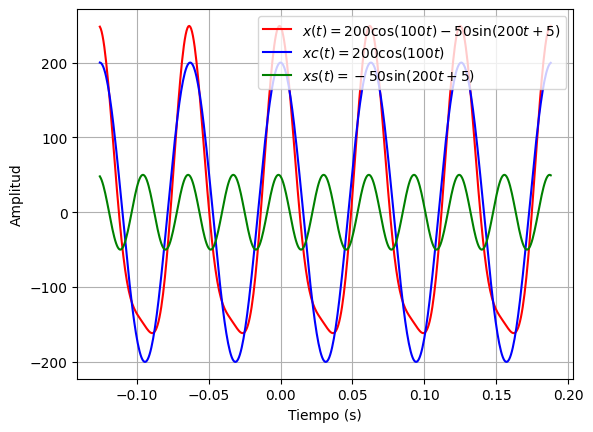

Frecuencia de muestreo: 1591.5494309189532 Hz


(500,)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#declaramos todas las variables de la funciòn o señal
A1 = 200
A2 = 50
w1 = 100
w2 = 200
phi2= 5
T1 = 2*np.pi/w1 #periodo de la funcion coseno
T2 = 2*np.pi/w2 #periodo de la funcion seno
F1 = w1/(2*np.pi)
F2 = w2/(2*np.pi)
Fs = 50*max(F1,F2) #frecuencia de muestreo la maxima entre las dos o definir frecuiencia de muestreo segun nyquist
T = np.pi/50 #periodo señal cuasiperiodica mcm (T1,T2)

#definimos el vector tiempo
ti = -2*T #2 periodos hacia atràs
tf = 3*T #3 periodos hacia delante
Ts = 1/Fs #periodo de muestreo

tv = np.arange(ti,tf,Ts) #tiempo de muestreo

#construimos la señal

x = A1*np.cos(w1*tv) - A2*np.sin(w2*tv+phi2)
xc = A1*np.cos(w1*tv)
xs = -A2*np.sin(w2*tv+phi2)

plt.plot(tv,x,'r',label='$x(t) = 200\cos(100 t)- 50 \sin(200t +5)$')
plt.plot(tv,xc,'b',label='$xc(t) = 200\cos(100 t)$')
plt.plot(tv,xs,'g',label='$xs(t) = - 50 \sin(200t +5)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()
print(f"Frecuencia de muestreo: {Fs} Hz")

tv.shape

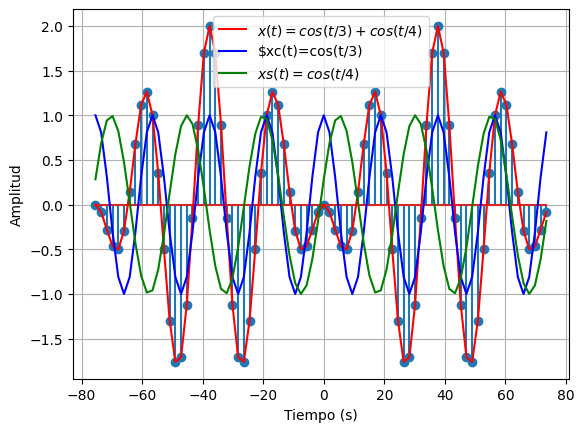

Frecuencia de muestreo: 0.5305164769729844 Hz


(80,)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#declaramos todas las variables de la funciòn o señal
A1 = 1
A2 = 1
w1 = 1/3
w2 = 1/4
T1 = 2*np.pi/w1 #periodo de la funcion coseno
T2 = 2*np.pi/w2 #periodo de la funcion seno
F1 = w1/(2*np.pi)
F2 = w2/(2*np.pi)
Fs = 10*max(F1,F2) #frecuencia de muestreo la maxima entre las dos o definir frecuiencia de muestreo segun nyquist
T = 24*np.pi #periodo señal cuasiperiodica mcm (T1,T2)

#definimos el vector tiempo
ti = -1*T #2 periodos hacia atràs
tf = 1*T #3 periodos hacia delante
Ts = 1/Fs #periodo de muestreo

tv = np.arange(ti,tf,Ts) #tiempo de muestreo

#construimos la señal

x = A1*np.cos(w1*tv) - A2*np.cos(w2*tv)
xc = A1*np.cos(w1*tv)
xs = A2*np.cos(w2*tv+phi2)

plt.stem(tv,x)
plt.plot(tv,x,'r',label='$x(t)=cos(t/3)+cos(t/4)$')
plt.plot(tv,xc,'b',label='$xc(t)=cos(t/3)')
plt.plot(tv,xs,'g',label='$xs(t)=cos(t/4)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()
print(f"Frecuencia de muestreo: {Fs} Hz")

tv.shape

In [35]:
#crear funcion en python
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

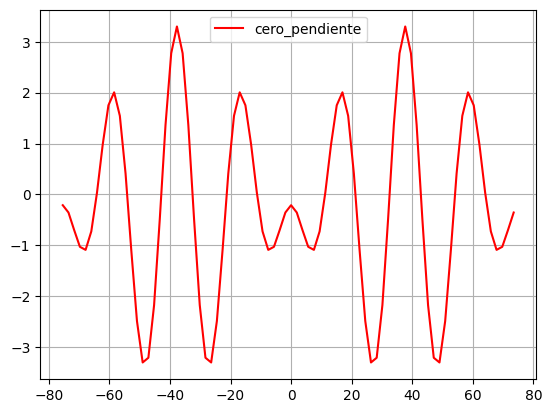

In [38]:
ymin = -3.3
ymax = 3.3
xcp = my_ceropen(x, ymin, ymax)
plt.plot(tv,xcp,'r',label='cero_pendiente')
plt.legend()
plt.grid()
plt.show()


In [48]:
from scipy.spatial.distance import cdist
nbits = 4
num_est = 2**nbits
vq = np.linspace(ymin,ymax,num_est)

In [44]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [45]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(xcp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0

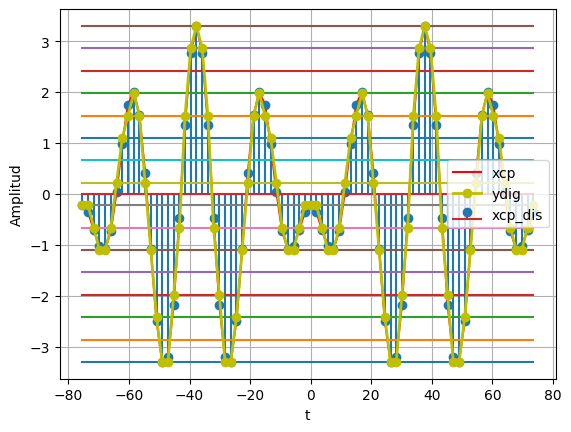

In [47]:
#graficar señales

plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='xcp_dis')#cs discreta

#estados de cuantización

for v in vq:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()